# EX NO-12 Face Detection using Haar Cascades with OpenCV and Matplotlib
# NAME : pavithran mj
# REG NO : 212223240112

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Step 1: Read the image and convert the image into RGB
image = cv2.imread('1111.jpg')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

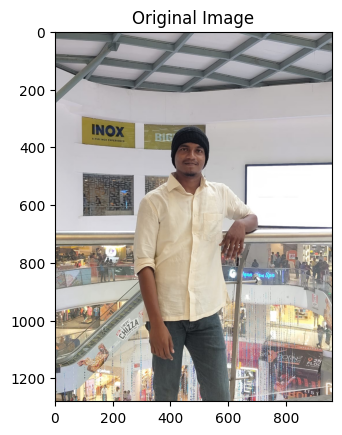

In [6]:
# Step 2: Display the original image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('on')
plt.show()

In [7]:
# Step 4: Set the pixels to display the ROI (Region of Interest)
# Define the coordinates for the Region of Interest (ROI)
# (startY:endY, startX:endX)
roi = image[100:420, 200:550]  # ROI coordinates (adjust as needed)

# Create a blank mask of the same size as the original image
mask = np.zeros_like(image)

# Place the ROI on the mask
mask[100:420, 200:550] = roi

In [8]:
# Step 5: Perform bitwise conjunction of the two arrays using bitwise_and
segmented_roi = cv2.bitwise_and(image, mask)

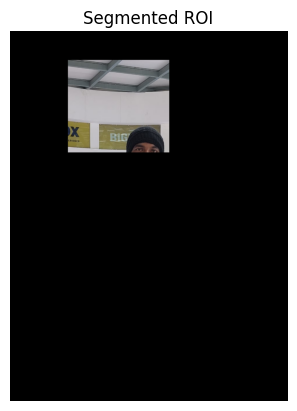

In [9]:
# Step 6: Display the segmented ROI from the image
segmented_roi_rgb = cv2.cvtColor(segmented_roi, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_roi_rgb)
plt.title("Segmented ROI")
plt.axis('off')
plt.show()


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Step 1: Read the image and convert it to RGB for displaying
image = cv2.imread('1111.jpg')  # Replace with your actual image file path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

(np.float64(-0.5), np.float64(959.5), np.float64(1279.5), np.float64(-0.5))

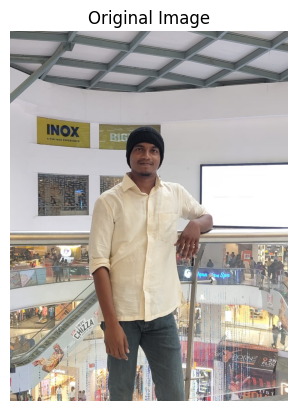

In [14]:
# Original Image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

In [15]:
# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale


In [16]:
# Step 3: Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Apply Gaussian blur (5x5 kernel)

In [17]:
# Step 5: Use Canny edge detector to find edges
edges = cv2.Canny(blurred_image, 50, 150)  # Detect edges using Canny (thresholds 50 and 150)

(np.float64(-0.5), np.float64(959.5), np.float64(1279.5), np.float64(-0.5))

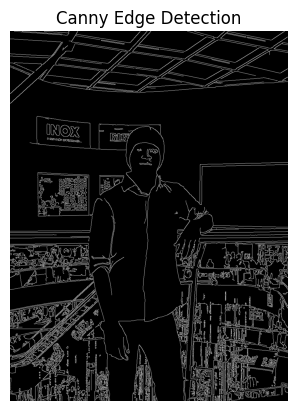

In [18]:
# Canny Edge Detection
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

In [19]:
# Step 6: Find contours in the edged image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
# Step 7: Filter contours based on area and draw bounding boxes
result_image = image.copy()  # Create a copy of the original image to draw bounding boxes
for contour in contours:
    if cv2.contourArea(contour) > 50:  # Filter out small areas
        x, y, w, h = cv2.boundingRect(contour)  # Get the bounding box for the contour
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw the rectangle

(np.float64(-0.5), np.float64(959.5), np.float64(1279.5), np.float64(-0.5))

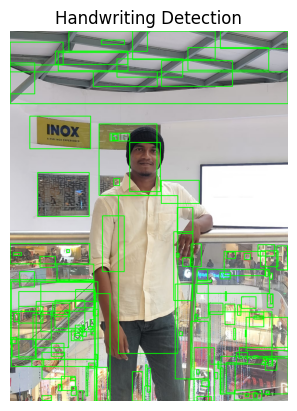

In [21]:
# Handwriting Detection Result
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Handwriting Detection")
plt.axis('off')

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
config_file = 'deploy.prototxt'  # Path to the config file
weights = 'mobilenet_iter_73000.caffemodel'  # Path to the weights file

In [24]:
# Step 2: Use a pretrained DNN model (MobileNet-SSD v3)
net = cv2.dnn.readNetFromCaffe(config_file, weights)

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'cv::dnn::ReadProtoFromTextFile'


In [ ]:
# Step 4: Create a class label and print the same
class_labels = {0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat',
                5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 9: 'chair', 10: 'cow', 11: 'diningtable',
                12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant', 17: 'sheep',
                18: 'sofa', 19: 'train', 20: 'tvmonitor'}

In [ ]:
# Step 5: Read the image
image = cv2.imread('1111.jpg')  # Replace with your image path
(h, w) = image.shape[:2]

In [ ]:
# Convert image to RGB for displaying with Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Create a blob for DNN processing
blob = cv2.dnn.blobFromImage(image, 0.007843, (300, 300), 127.5)

In [ ]:
# Step 6: Set the model and threshold to 0.5
net.setInput(blob)
detections = net.forward()

In [25]:
# Step 7: Flatten the index, confidence
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > 0.5:  # Confidence threshold
        index = int(detections[0, 0, i, 1])  # Get class index
        label = class_labels[index]  # Get label name
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
# Step 8: Draw rectangles and labels on the image
        cv2.rectangle(image_rgb, (startX, startY), (endX, endY), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

NameError: name 'detections' is not defined

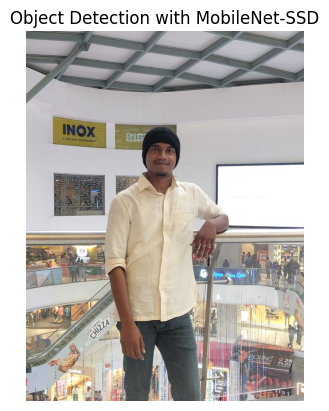

In [26]:
# Step 9: Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title("Object Detection with MobileNet-SSD")
plt.axis("off")
plt.show()